**IMPORTS**

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler

**DATA FRAME**


In [37]:
df = pd.read_csv('carprice-assignment-6447798486dfd210498974.csv')
# pd.set_option('display.max_rows', None)
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


**NETOYAGE**

In [38]:
df.isnull().count()

car_ID              205
symboling           205
CarName             205
fueltype            205
aspiration          205
doornumber          205
carbody             205
drivewheel          205
enginelocation      205
wheelbase           205
carlength           205
carwidth            205
carheight           205
curbweight          205
enginetype          205
cylindernumber      205
enginesize          205
fuelsystem          205
boreratio           205
stroke              205
compressionratio    205
horsepower          205
peakrpm             205
citympg             205
highwaympg          205
price               205
dtype: int64

In [39]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [40]:
df['marck'] = df['CarName'].apply( lambda x : x.split(' ', 1)[0].lower())
df['model'] = df['CarName'].apply( lambda x : x.split(' ', 1)[-1])
df[['marck','model']]


,marck,model
0,alfa-romero,giulia
1,alfa-romero,stelvio
2,alfa-romero,Quadrifoglio
3,audi,100 ls
4,audi,100ls
...,...,...
200,volvo,145e (sw)
201,volvo,144ea
202,volvo,244dl
203,volvo,246


In [41]:
df['marck']= df['marck'].replace({'vw' : 'volkswagen' , 'vokswagen' : 'volkswagen', 'toyouta': 'toyota', 'porcshce' : 'porsche', 'maxda':'mazda'})

In [42]:
df = df.drop(['CarName' ,'car_ID'] , axis=1)

In [43]:
for elt in ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation']:
    print(df[elt].unique())


['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']


*convertissement*

In [44]:
for elt in ['wheelbase', 'carlength', 'carwidth',  'carheight']:
    df[elt] = (df[elt]*2.54)/100
    
df['curbweight'] = (df['curbweight']* 0.45359237).round(2)

In [45]:
cyl_dict = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
df['cylindernumber'] = df['cylindernumber'].apply(lambda x: cyl_dict[x])


In [46]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,marck,model
0,3,gas,std,two,convertible,rwd,front,2.25044,4.28752,1.62814,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,gas,std,two,convertible,rwd,front,2.25044,4.28752,1.62814,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,gas,std,two,hatchback,rwd,front,2.40030,4.34848,1.66370,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,gas,std,four,sedan,fwd,front,2.53492,4.48564,1.68148,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,gas,std,four,sedan,4wd,front,2.52476,4.48564,1.68656,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [47]:
df.to_csv('cleaned_data.csv')

**ANALYSE**

In [48]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title = "Profiling REport")

In [49]:
# profile.to_widgets()

**MODEL ML**

***TRAINSET & TESTSET & PREPROCESSING***

In [50]:
y = df['price']
X = df.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


categorial_features = ['symboling', 'fueltype', 'aspiration', 'doornumber',  'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'marck', 'model'   ]
#numeric_features = X.columns.drop(categorial_features)
numeric_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
        'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'cylindernumber']



numeric_transformer = Pipeline([
        #('imputer', SimpleImputer(strategy='mean')),
        #('min_max', MinMaxScaler()),  
        ('rbscaler' , RobustScaler())
        ])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorial_features)
    ]
)

**CHOIX MODEL**

*RIDGE MODEL*

In [51]:
model = Ridge()
pipe = Pipeline([
     ('prep', preprocessor),
     ('model', model)
])

In [52]:
# # Entrainement sur X_train
# trained_pipe = pipe.fit(X_train,y_train)

# # prediction sur X_test
# # trained_pipe.predict(X_test)

# # scoring sur X_test
# trained_pipe.score(X_test,y_test)

***OPTIMISATION HYPER PARAMETRE RIDGE MODEL***

In [53]:
from sklearn.model_selection import GridSearchCV
parameters = {'model__alpha':[1, 10]}

# define the grid search
grid = GridSearchCV(pipe, parameters,cv=5)

#fit the grid search
grid.fit(X_train,y_train)

# best estimator
print(grid.best_score_)
print(grid.best_estimator_)
# best model
best_model = grid.best_estimator_
best_model.fit(X_train,y_train)


0.9025310065715203
Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('rbscaler',
                                                                   RobustScaler())]),
                                                  ['wheelbase', 'carlength',
                                                   'carwidth', 'carheight',
                                                   'curbweight', 'enginesize',
                                                   'boreratio', 'stroke',
                                                   'compressionratio',
                                                   'horsepower', 'peakrpm',
                                                   'citympg', 'highwaympg',
                                                   'cylindernumber']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknow

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('rbscaler',
                                                                   RobustScaler())]),
                                                  ['wheelbase', 'carlength',
                                                   'carwidth', 'carheight',
                                                   'curbweight', 'enginesize',
                                                   'boreratio', 'stroke',
                                                   'compressionratio',
                                                   'horsepower', 'peakrpm',
                                                   'citympg', 'highwaympg',
                                                   'cylindernumber']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['symboling', 'fueltype',
                                                   'aspiration', 'doornumber',
                                                   'carbody', 'drivewheel',
                                                   'enginelocation',
                                                   'enginetype', 'fuelsystem',
                                                   'marck', 'model'])])),
                ('model', Ridge(alpha=1))])

***PERFORMANCE RIDGE MODEL***

In [54]:
from sklearn.model_selection import learning_curve
import numpy as np
N, train_score, val_score = learning_curve(best_model,
                                           X_train, 
                                           y_train, 
                                           train_sizes = np.linspace(0.1, 1.0, 10),
                                           cv = 5,
                                           n_jobs= 4)

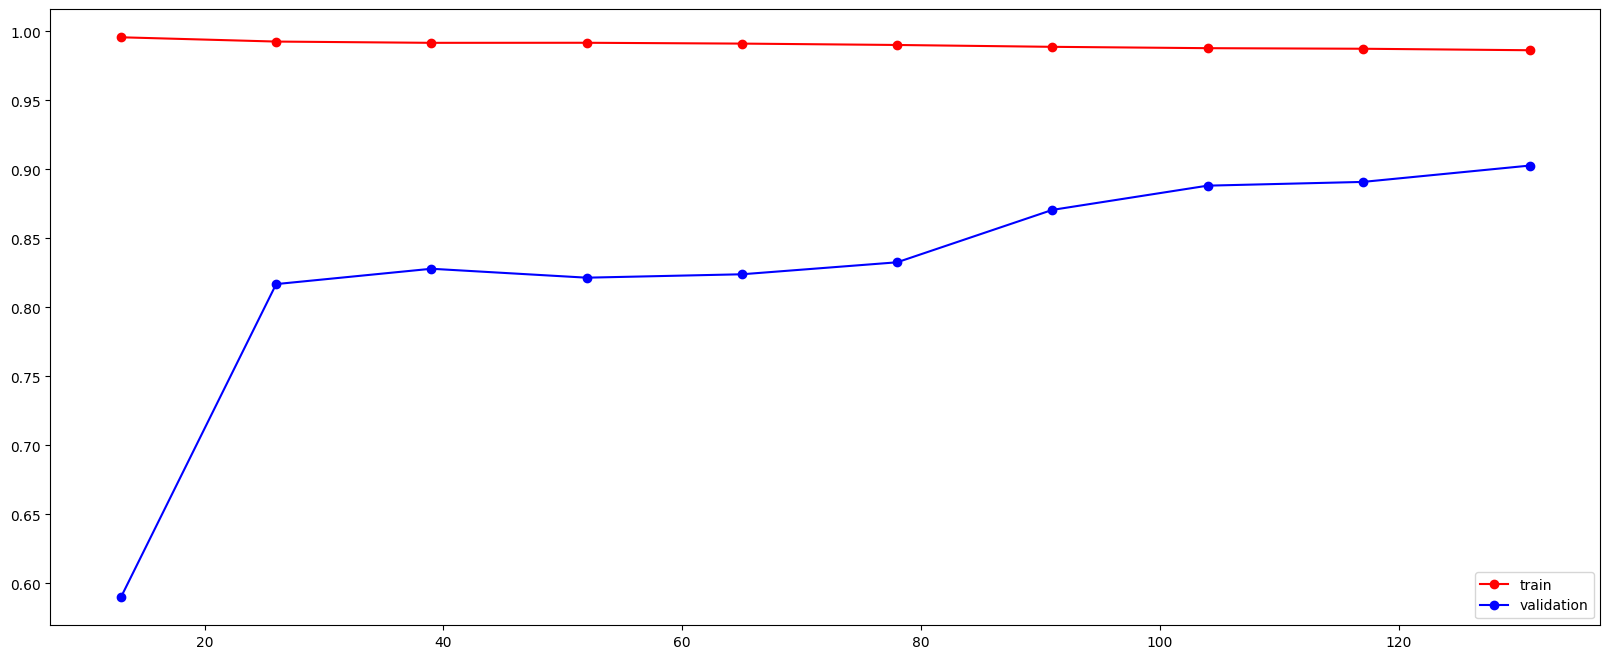

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,8))
plt.plot(N, train_score.mean(axis=1), 'o-', color="r", label = 'train')
plt.plot(N, val_score.mean(axis=1) , 'o-', color="b", label = 'validation')
plt.legend()
plt.show()

*LASSO & ELASTICNET MODELS*

/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2126611.473759547, tolerance: 978060.5331304879
  model = cd_fast.sparse_enet_coordinate_descent(
/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.546e+04, tolerance: 2.513e+04
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 787610.2838454756, tolerance: 102004.51946153847

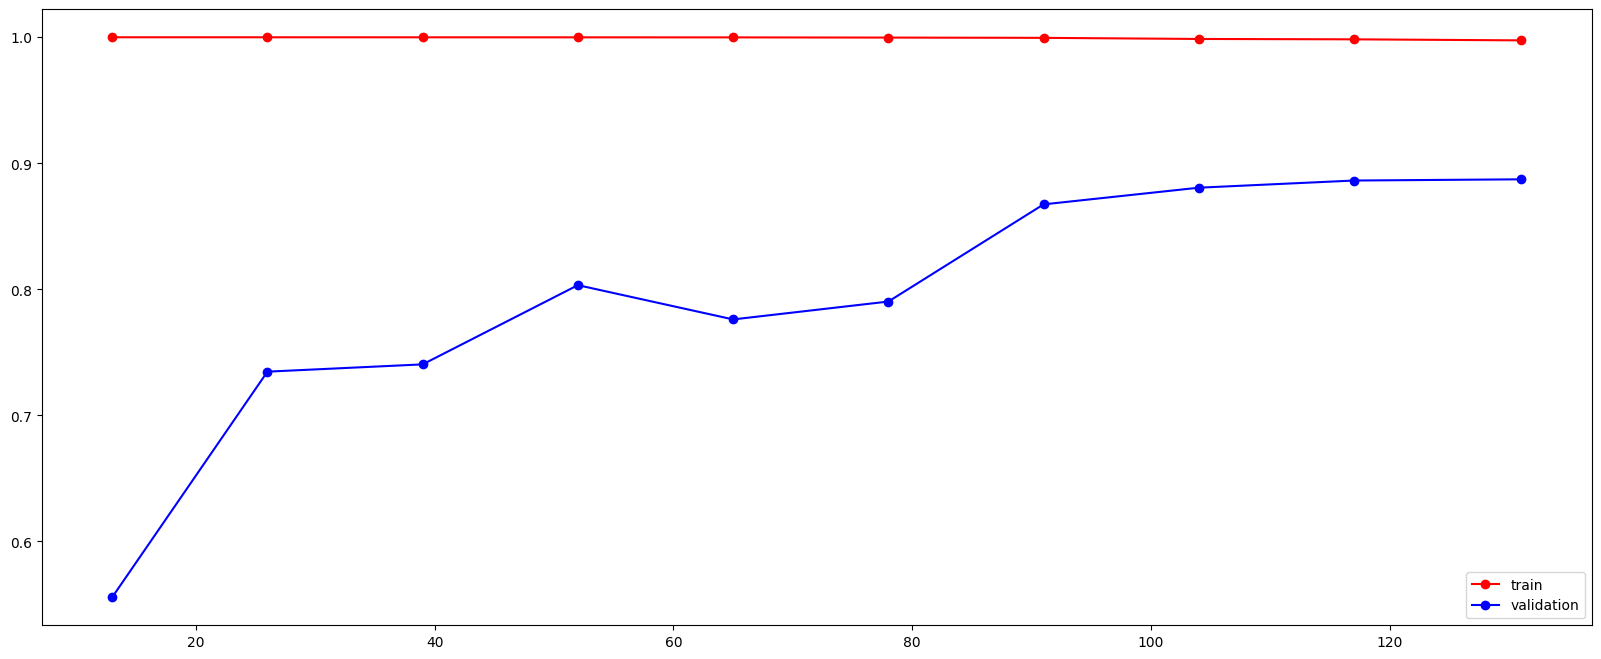

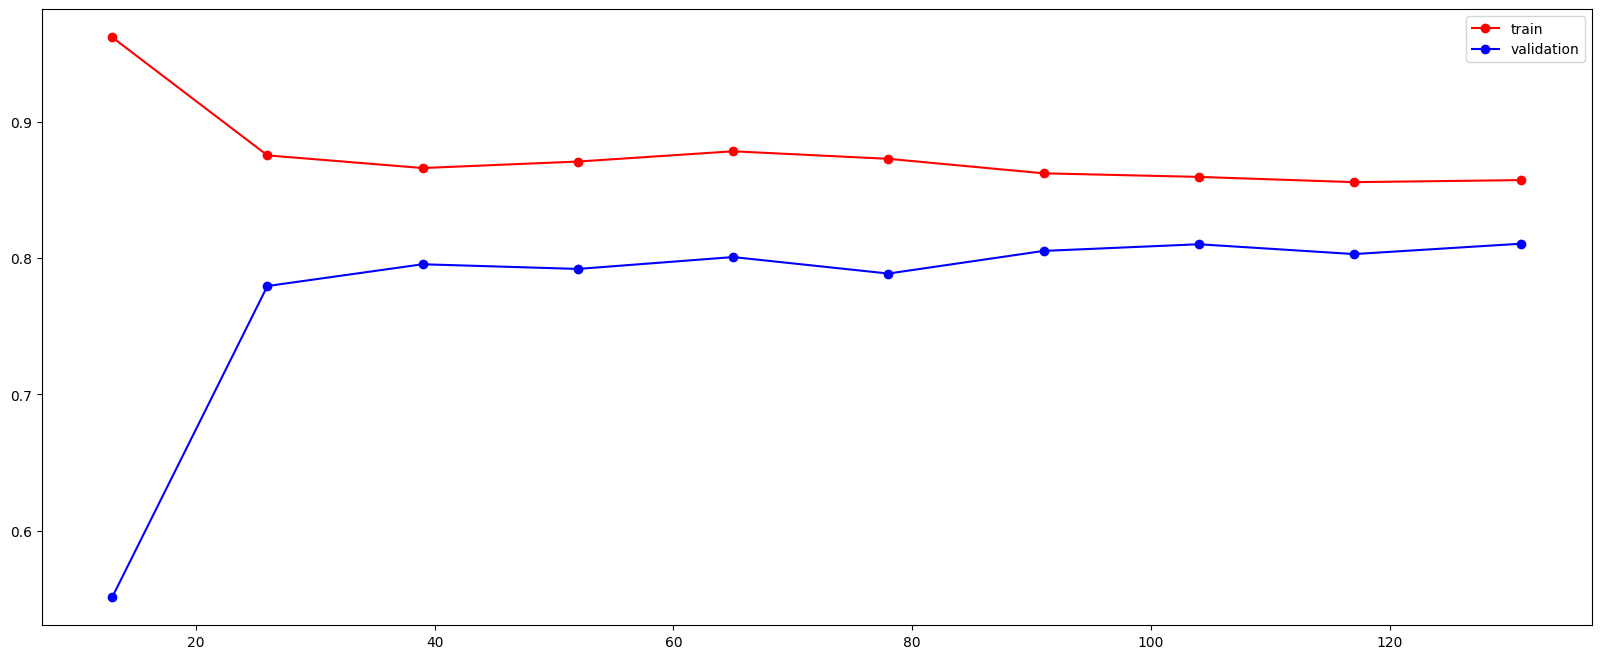

In [56]:
for mdl in [Lasso(), ElasticNet()]:
     pipe_l = Pipeline([
               ('prep', preprocessor),
               ('model', mdl)
     ])
     trained_pipe_l = pipe_l.fit(X_train,y_train)
     trained_pipe_l.score(X_test,y_test)
     N, train_score, val_score = learning_curve(pipe_l,
                                           X_train, 
                                           y_train, 
                                           train_sizes = np.linspace(0.1, 1.0, 10),
                                           cv = 5,
                                           n_jobs= 4)
     plt.figure(figsize = (20,8))
     plt.plot(N, train_score.mean(axis=1), 'o-', color="r", label = 'train')
     plt.plot(N, val_score.mean(axis=1) , 'o-', color="b", label = 'validation')
     plt.legend()
     plt.show()

***RADOM FOREST MODEL***

In [57]:
model_r = RandomForestRegressor()
pipe_r = Pipeline([
     ('prep', preprocessor),
     ('model_r', model_r)
])

In [58]:
#optimisation
param_grid = {
    'model_r__n_estimators': [50, 100, 200],
    'model_r__max_depth': [5, 10, 15, 20],
    'model_r__min_samples_split': [2, 5, 10],
    'model_r__min_samples_leaf': [1, 2, 3],
    'model_r__max_features': ['sqrt', 'log2']
}
grid_r = GridSearchCV(pipe_r, param_grid, cv=5)
grid_r.fit(X_train,y_train)
print(grid_r.best_score_)
print(grid_r.best_estimator_)


0.8957320978058991
Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('rbscaler',
                                                                   RobustScaler())]),
                                                  ['wheelbase', 'carlength',
                                                   'carwidth', 'carheight',
                                                   'curbweight', 'enginesize',
                                                   'boreratio', 'stroke',
                                                   'compressionratio',
                                                   'horsepower', 'peakrpm',
                                                   'citympg', 'highwaympg',
                                                   'cylindernumber']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknow

In [59]:
best_model_r = grid_r.best_estimator_
best_model_r.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('rbscaler',
                                                                   RobustScaler())]),
                                                  ['wheelbase', 'carlength',
                                                   'carwidth', 'carheight',
                                                   'curbweight', 'enginesize',
                                                   'boreratio', 'stroke',
                                                   'compressionratio',
                                                   'horsepower', 'peakrpm',
                                                   'citympg', 'highwaympg',
                                                   'cylindernumber']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['symboling', 'fueltype',
                                                   'aspiration', 'doornumber',
                                                   'carbody', 'drivewheel',
                                                   'enginelocation',
                                                   'enginetype', 'fuelsystem',
                                                   'marck', 'model'])])),
                ('model_r',
                 RandomForestRegressor(max_depth=15, max_features='sqrt'))])

In [60]:
N_r, train_score_r, val_score_r = learning_curve(best_model_r,
                                           X_train, 
                                           y_train, 
                                           train_sizes = np.linspace(0.1, 1.0, 10),
                                           cv = 5,
                                           n_jobs= 4)

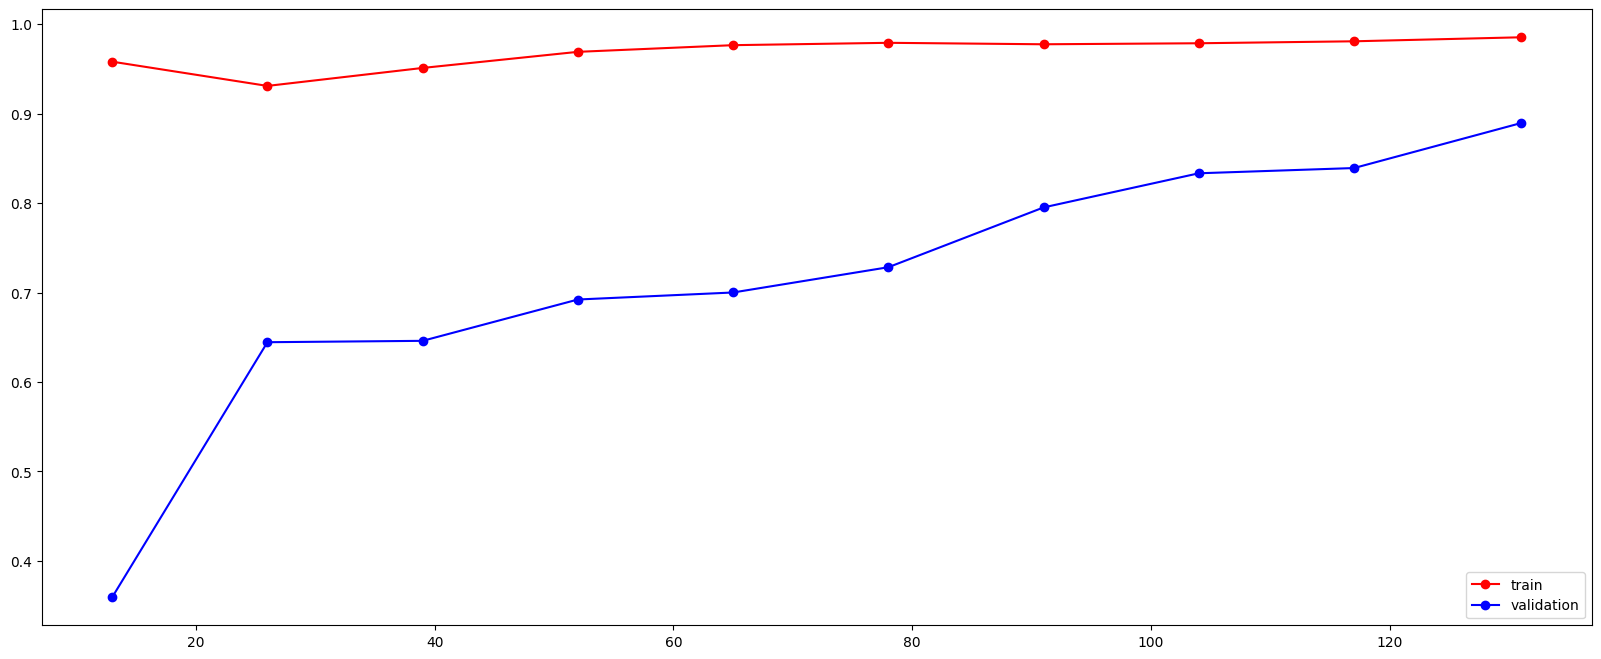

In [61]:
plt.figure(figsize = (20,8))
plt.plot(N_r, train_score_r.mean(axis=1), 'o-', color="r", label = 'train')
plt.plot(N_r, val_score_r.mean(axis=1) , 'o-', color="b", label = 'validation')
plt.legend()
plt.show()